In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage as ndi

from scipy.ndimage import label, generate_binary_structure
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
os.getcwd()

'e:\\LIDC-IDRI-Segmentation\\notebook'

In [3]:
IMAGE_DIR = 'E:\\preprocessing_lidc\\data\\Image'
MASK_DIR = 'E:\\preprocessing_lidc\\data\\Mask'
CLEAN_DIR_IMG ='E:\\preprocessing_lidc\\data\Clean\\Image'
CLEAN_DIR_MASK ='E:\\preprocessing_lidc\\data\Clean\\Mask'
PREDICT_DIR = 'E:\\preprocessing_lidc\\data\\Segmentation_output\\UNET_with_augmentation\\'

In [4]:
pid_list = os.listdir(PREDICT_DIR)[:10]

In [5]:
pid_list[0]

'0018_PD000_slice001.npy'

In [6]:
def view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR):
    
    for prediction in os.listdir(PREDICT_DIR)[30:60]:
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction.replace('PD','MA')
        image_id = prediction.replace('PD','NI')
        
        original_img= np.load(IMAGE_DIR+'/'+pid+'/'+image_id)
        mask_img= np.load(MASK_DIR+'/'+pid+'/'+mask_id)
        predict_mask =np.load(PREDICT_DIR+'/'+prediction)

        fig,ax = plt.subplots(1,3, figsize=(15,15))
        print(pid,prediction)
        ax[0].title.set_text('Original image')
        ax[0].imshow(original_img)
        ax[0].grid()
        ax[1].title.set_text('Mask image')
        ax[1].imshow(mask_img)
        ax[1].grid()
        ax[2].title.set_text('Predicted Mask image')
        ax[2].imshow(predict_mask)
        ax[2].grid()
        plt.show()


LIDC-IDRI-0025 0025_PD000_slice000.npy


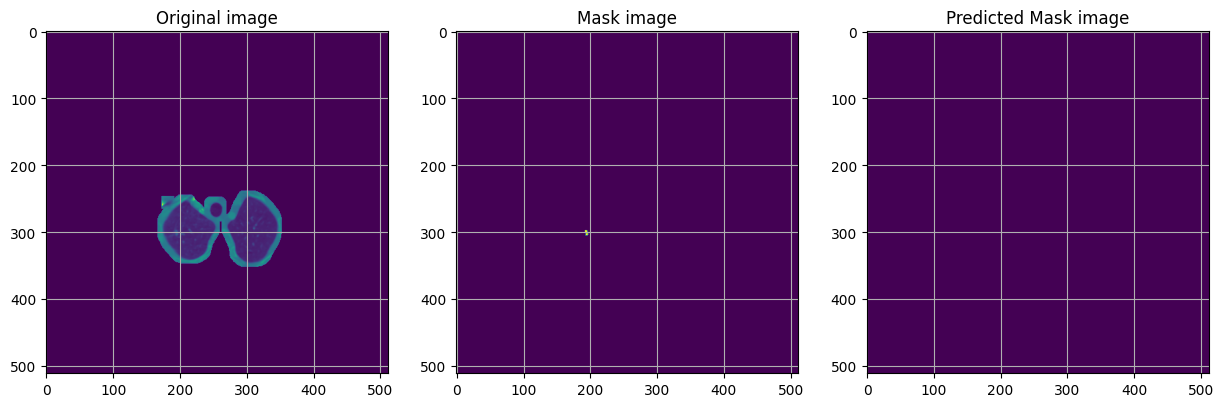

LIDC-IDRI-0025 0025_PD000_slice001.npy


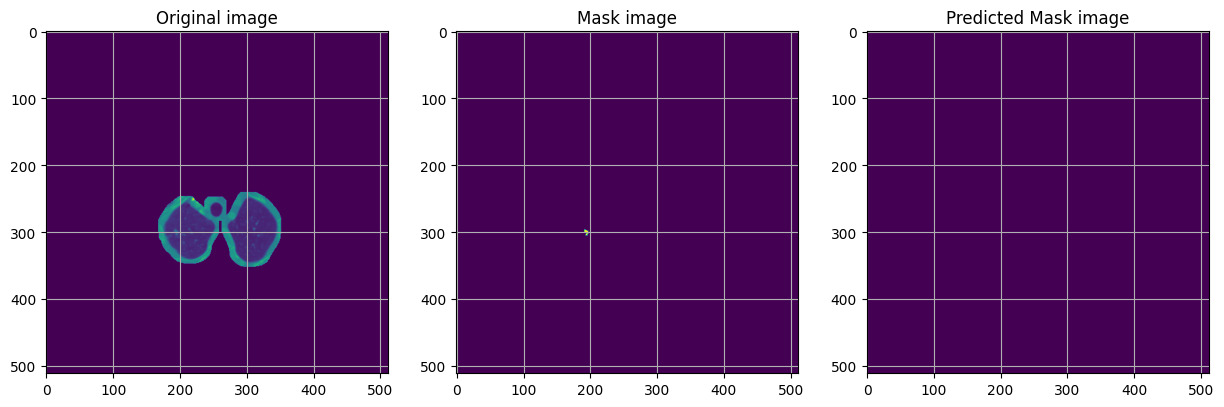

LIDC-IDRI-0025 0025_PD000_slice002.npy


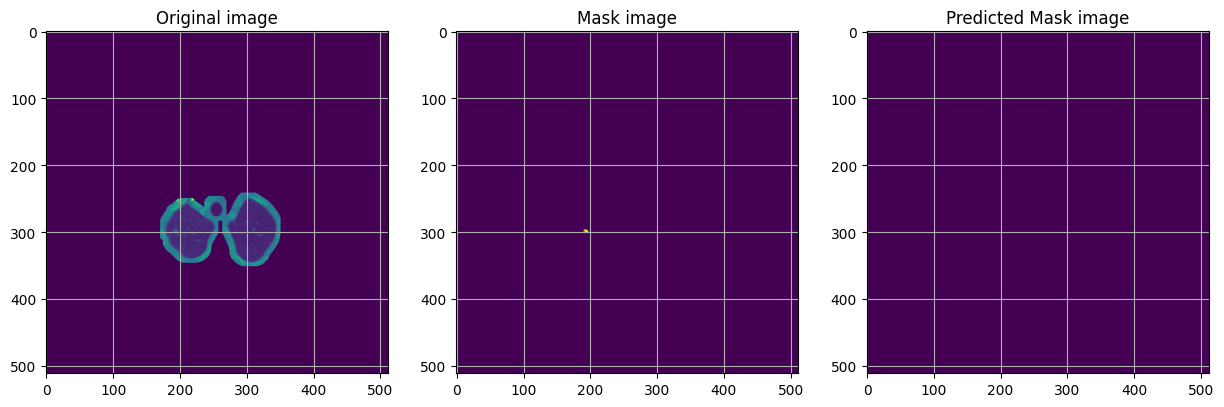

LIDC-IDRI-0027 0027_PD000_slice001.npy


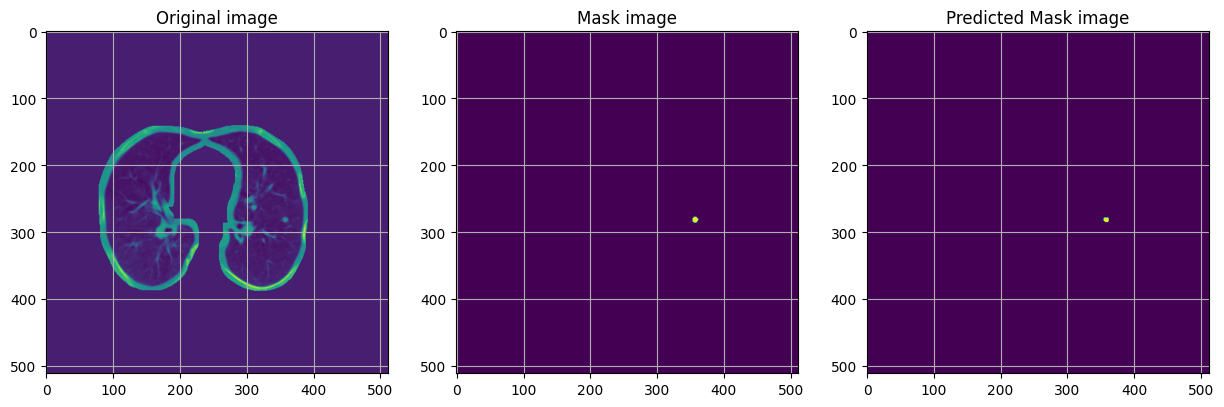

LIDC-IDRI-0027 0027_PD000_slice002.npy


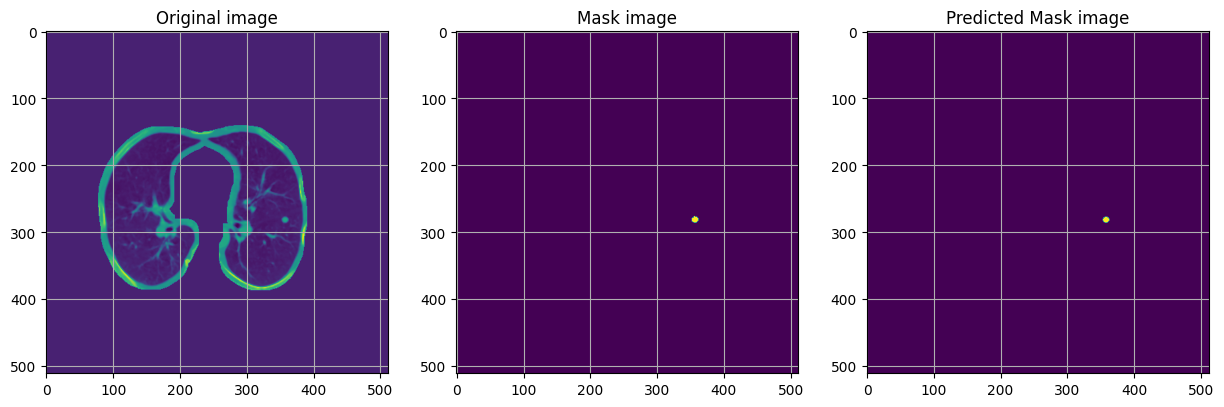

LIDC-IDRI-0027 0027_PD000_slice003.npy


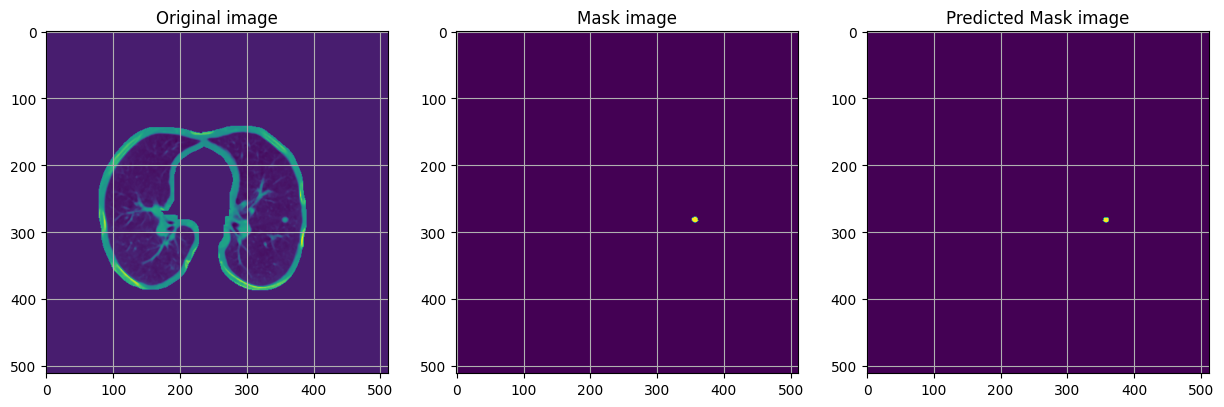

LIDC-IDRI-0027 0027_PD001_slice000.npy


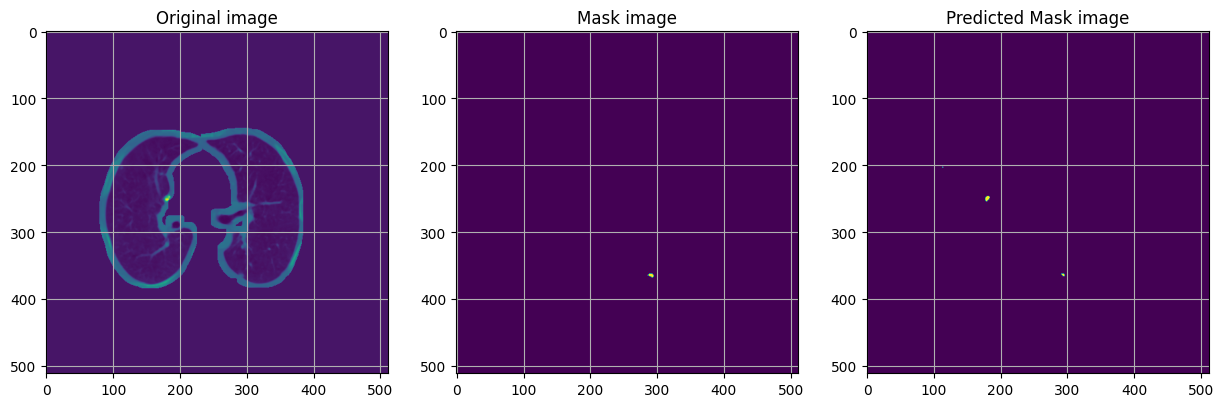

LIDC-IDRI-0027 0027_PD001_slice001.npy


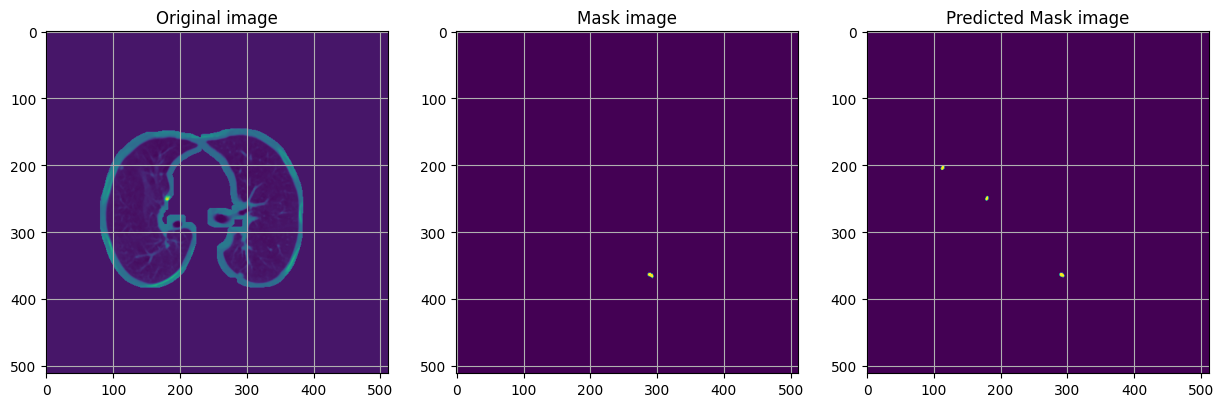

LIDC-IDRI-0027 0027_PD002_slice001.npy


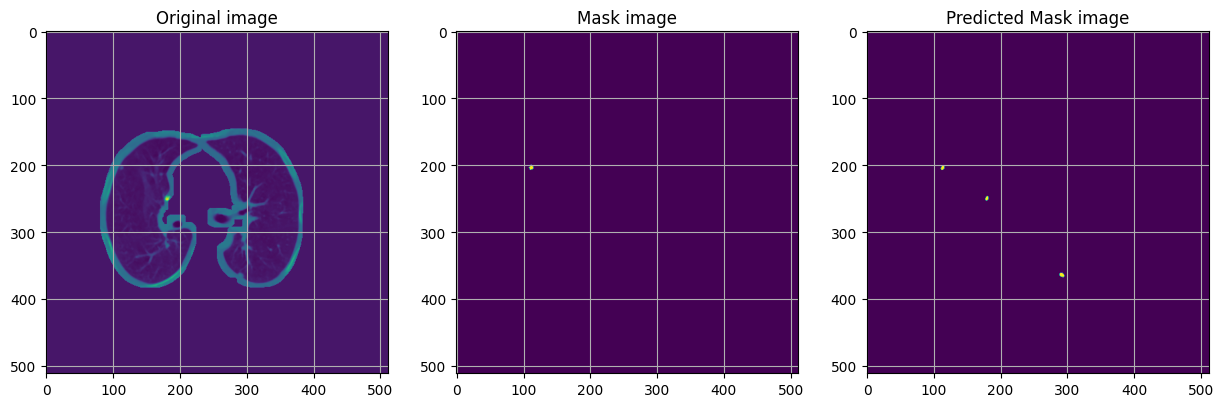

LIDC-IDRI-0027 0027_PD003_slice001.npy


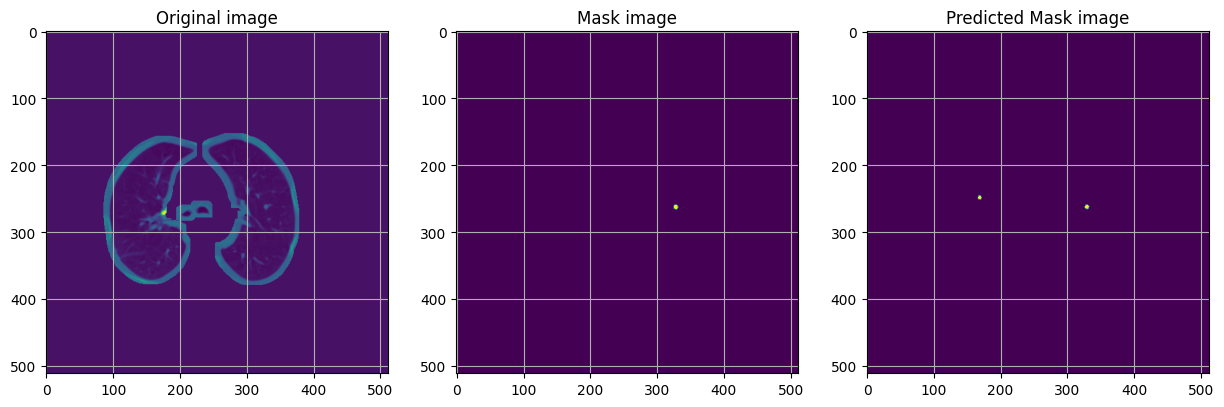

LIDC-IDRI-0027 0027_PD003_slice002.npy


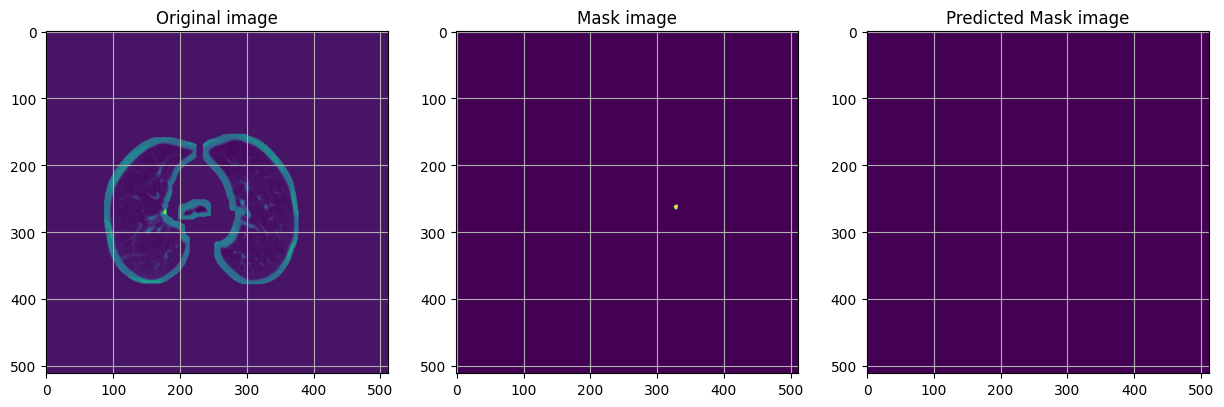

LIDC-IDRI-0027 0027_PD004_slice001.npy


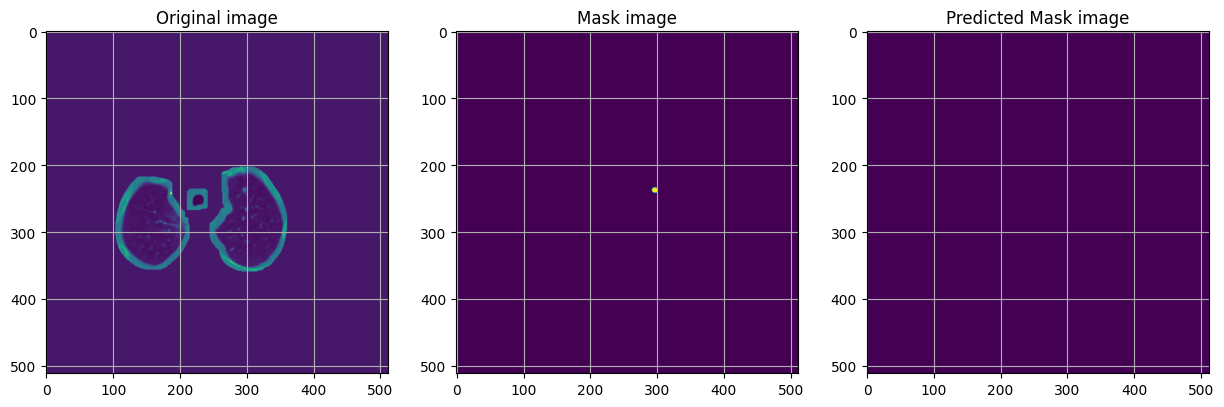

LIDC-IDRI-0027 0027_PD004_slice002.npy


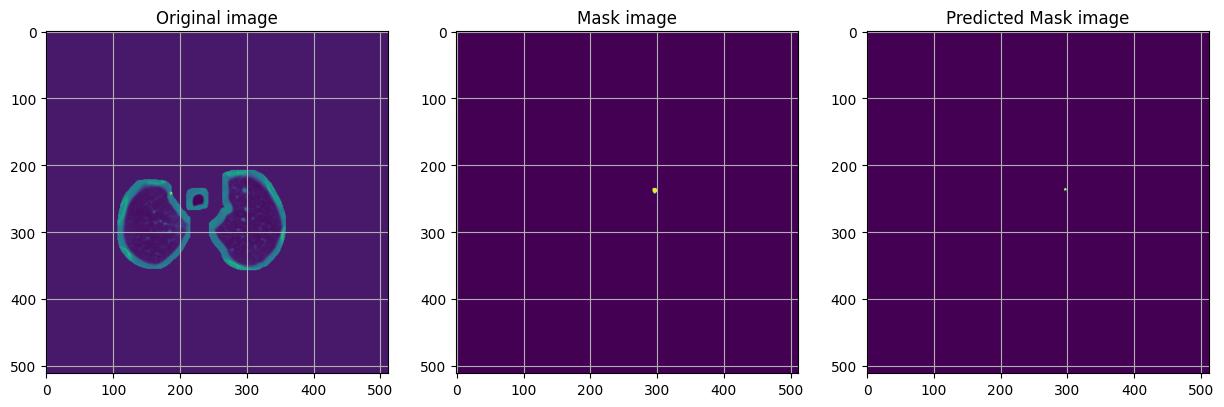

LIDC-IDRI-0027 0027_PD005_slice000.npy


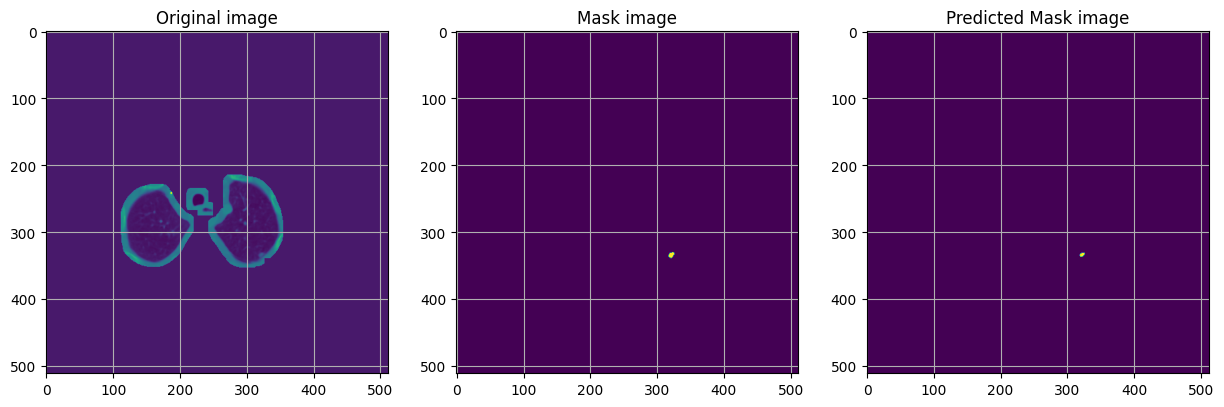

LIDC-IDRI-0027 0027_PD005_slice001.npy


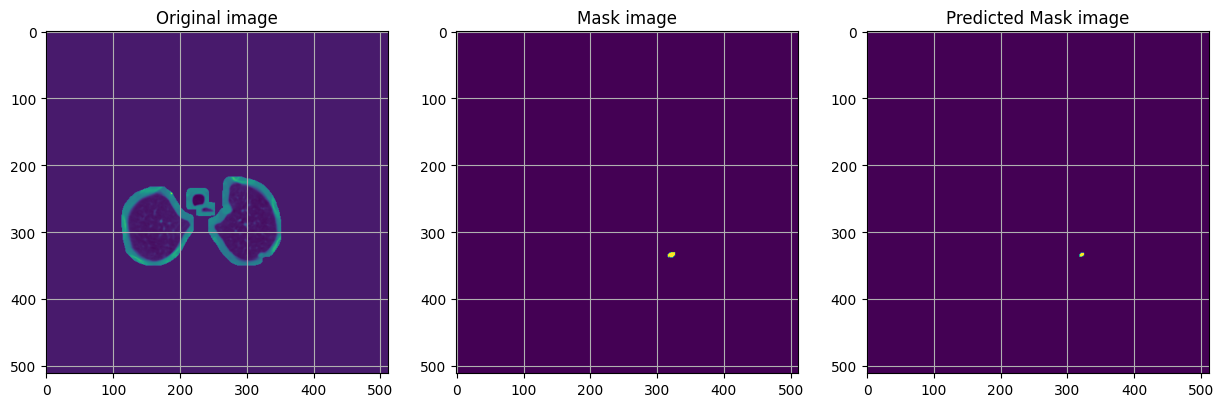

LIDC-IDRI-0030 0030_PD000_slice001.npy


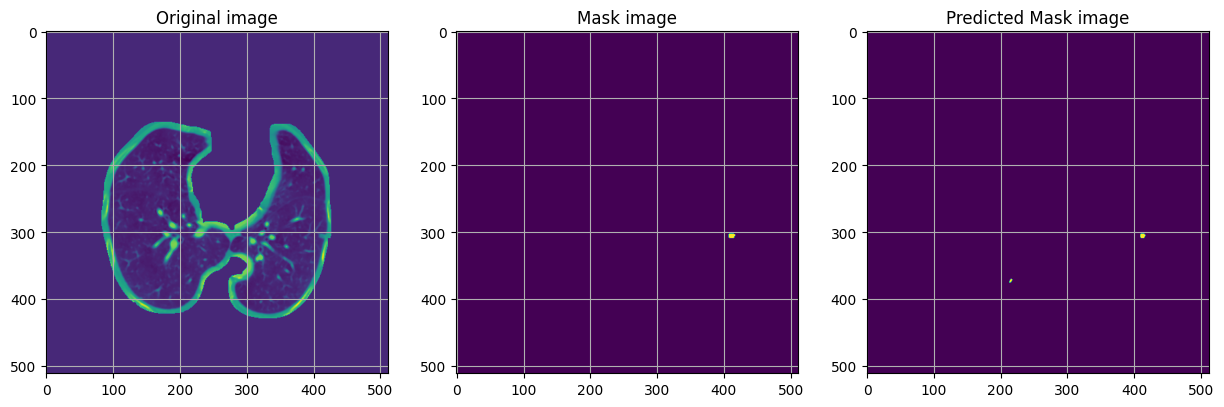

LIDC-IDRI-0030 0030_PD000_slice002.npy


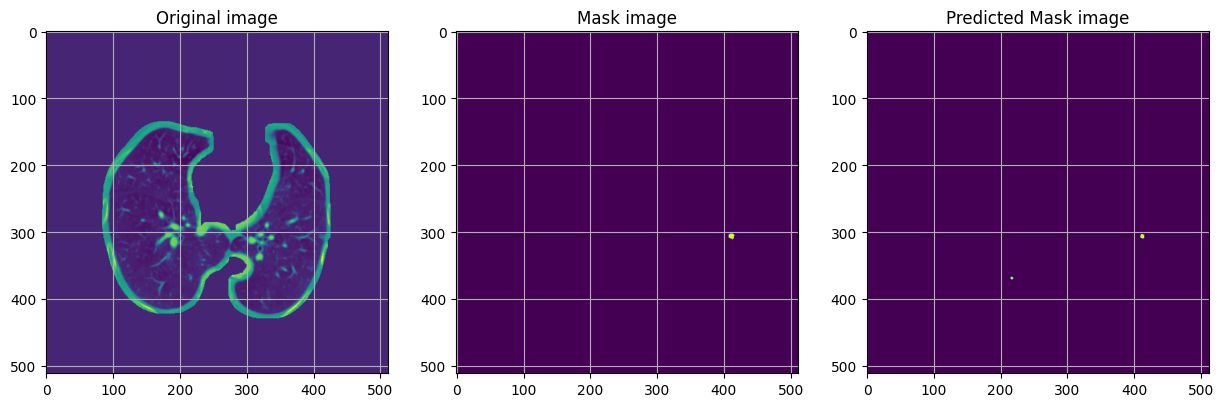

LIDC-IDRI-0030 0030_PD001_slice001.npy


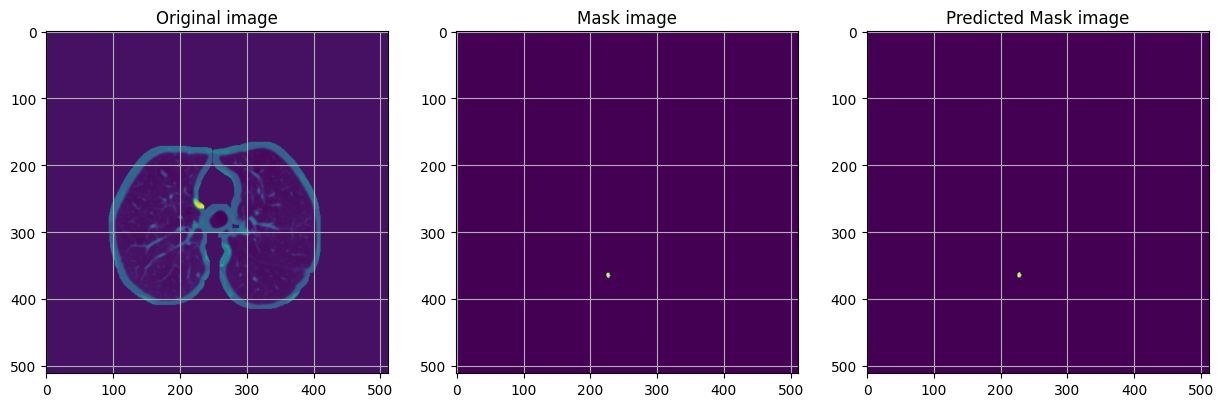

LIDC-IDRI-0031 0031_PD000_slice000.npy


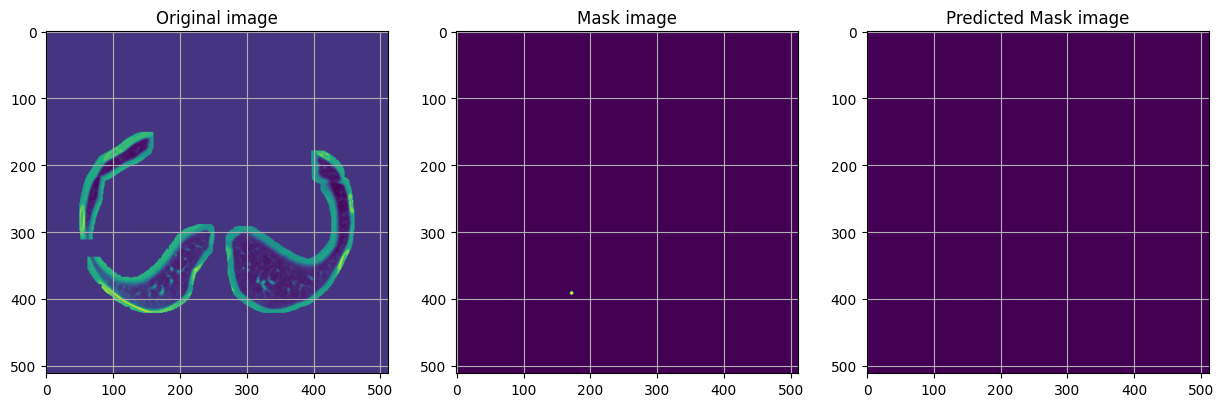

LIDC-IDRI-0031 0031_PD001_slice000.npy


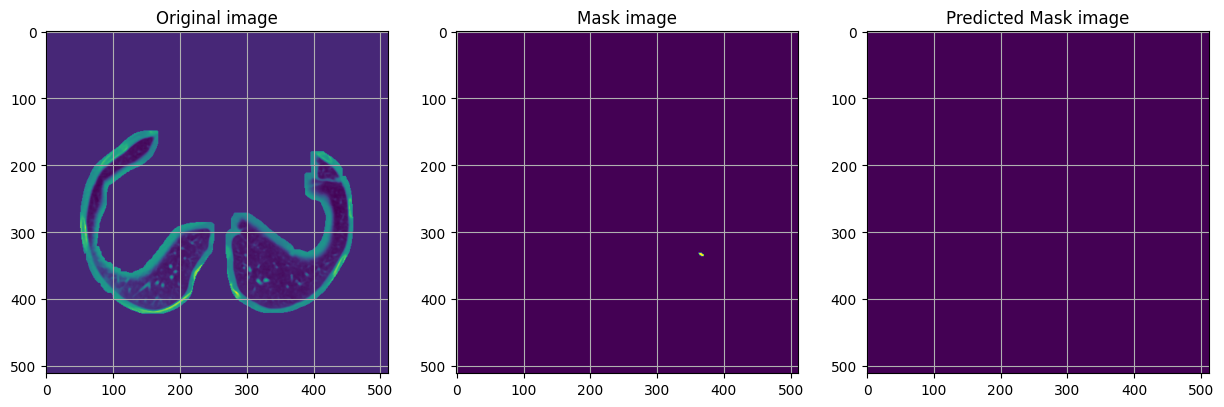

LIDC-IDRI-0031 0031_PD002_slice001.npy


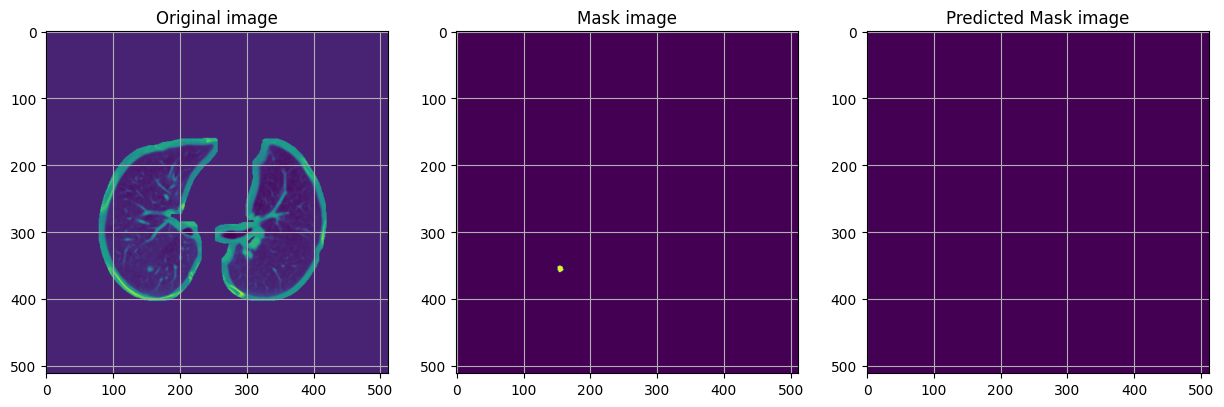

LIDC-IDRI-0031 0031_PD002_slice002.npy


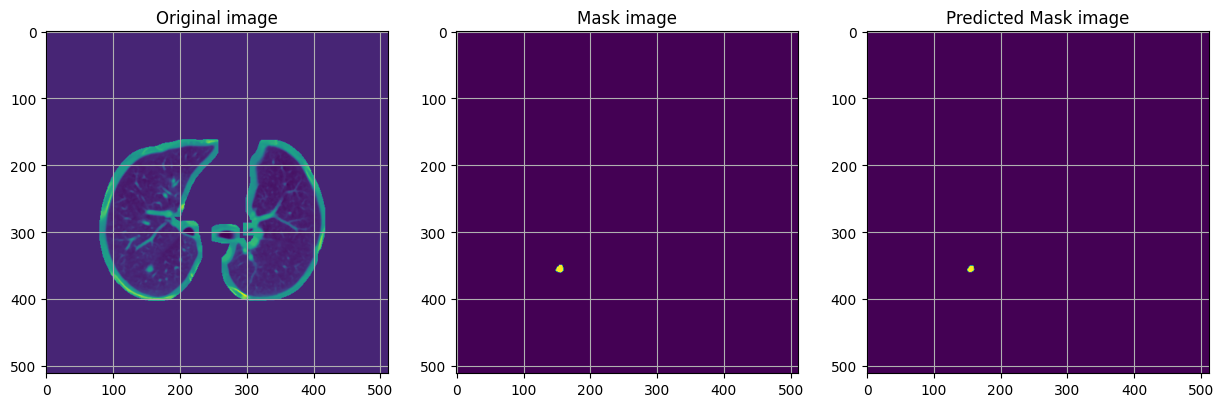

LIDC-IDRI-0031 0031_PD002_slice003.npy


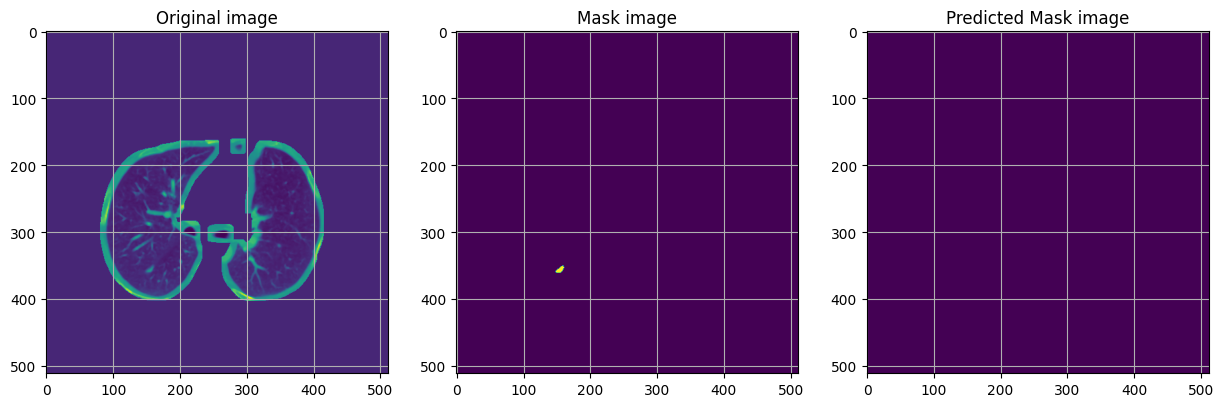

LIDC-IDRI-0031 0031_PD003_slice002.npy


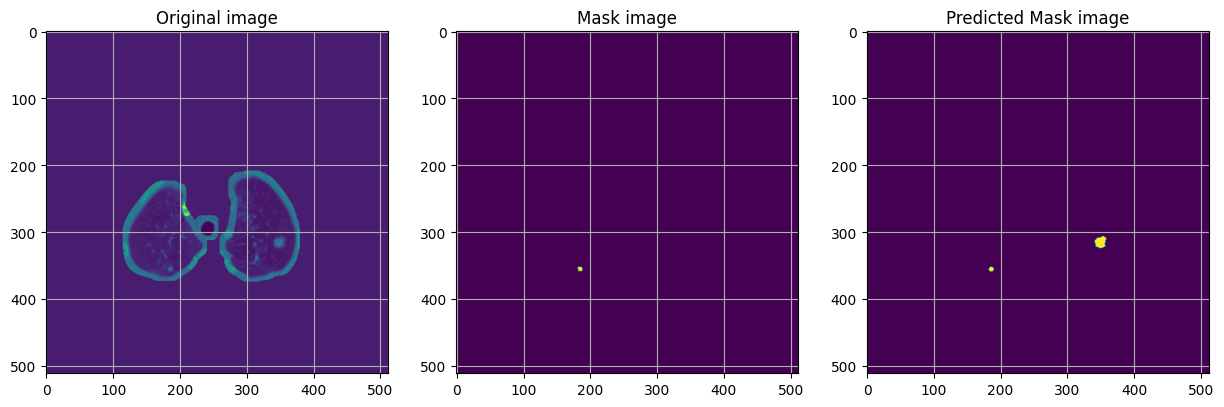

LIDC-IDRI-0031 0031_PD003_slice003.npy


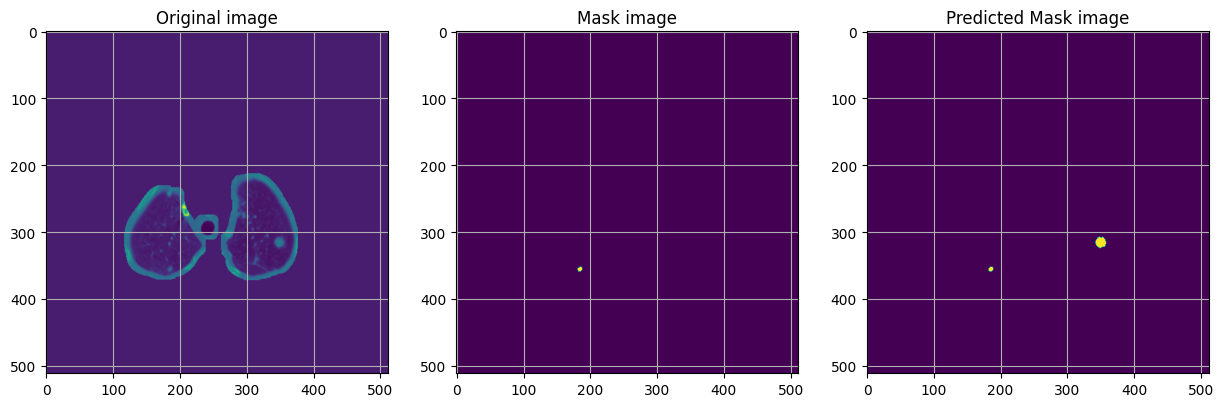

LIDC-IDRI-0031 0031_PD004_slice001.npy


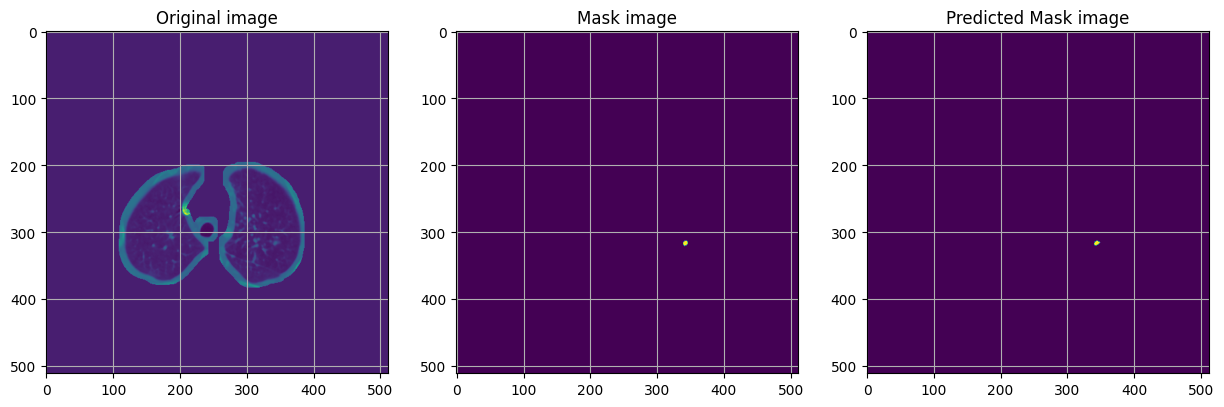

LIDC-IDRI-0031 0031_PD004_slice002.npy


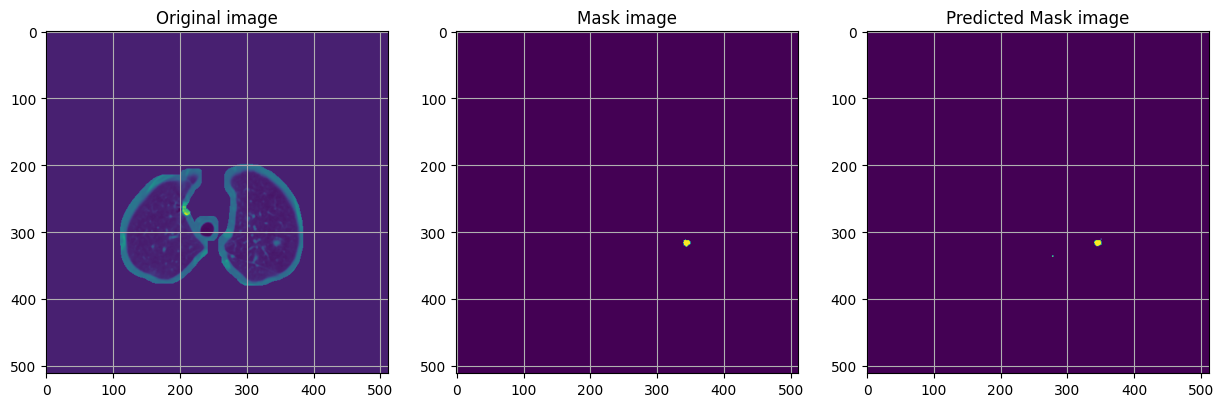

LIDC-IDRI-0031 0031_PD004_slice003.npy


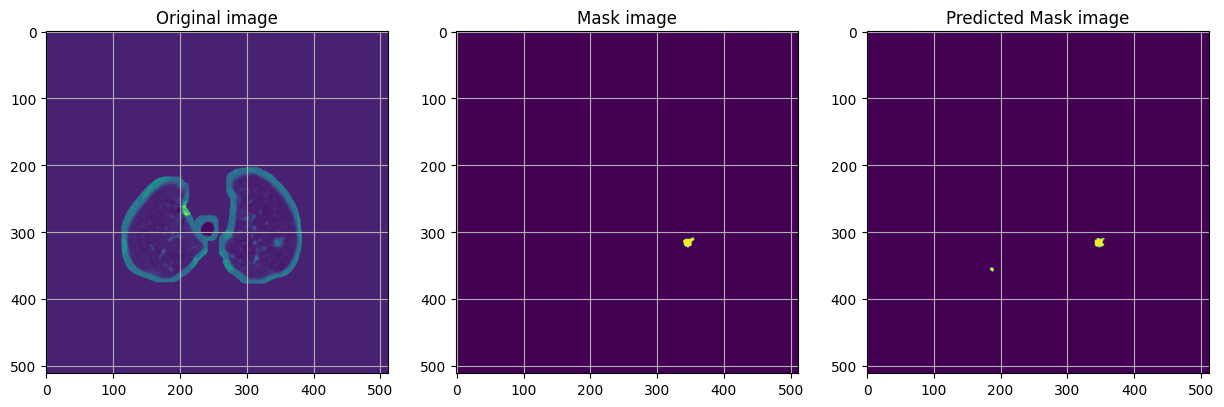

LIDC-IDRI-0031 0031_PD004_slice004.npy


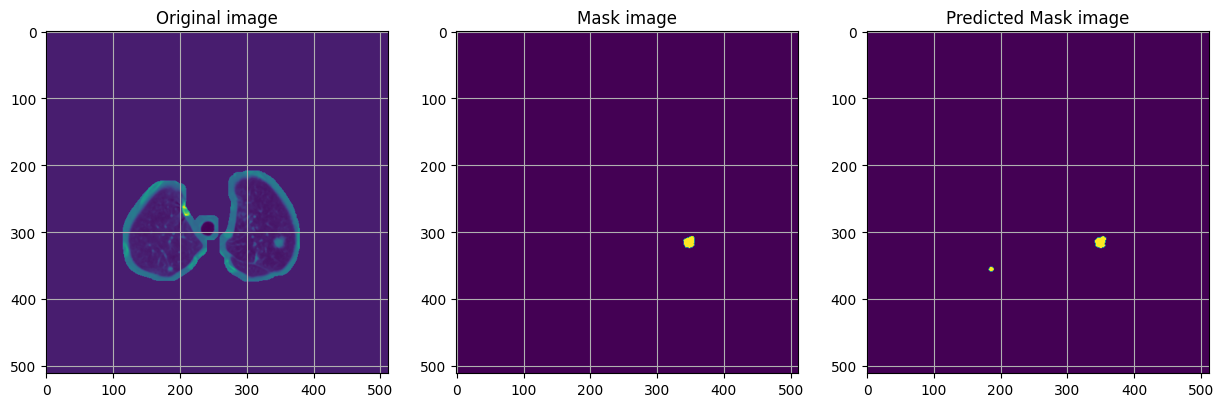

LIDC-IDRI-0031 0031_PD004_slice005.npy


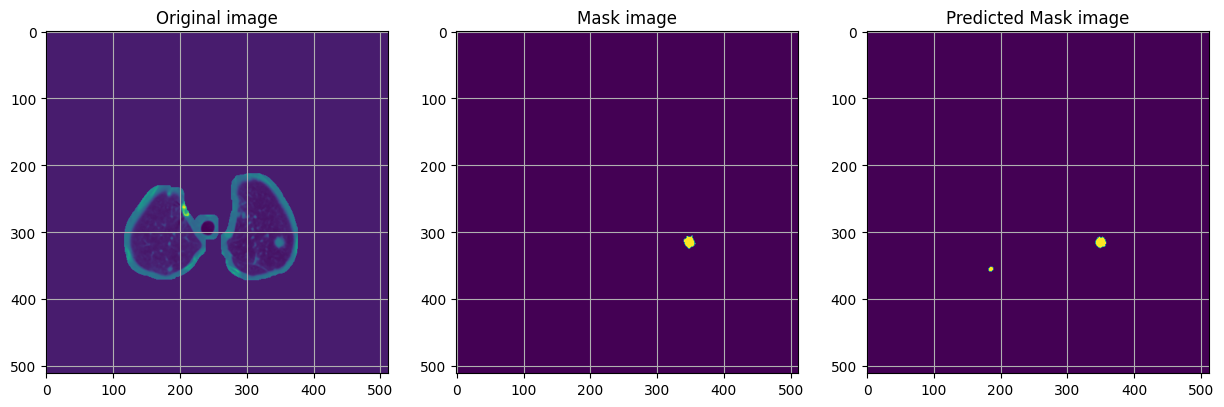

In [7]:
view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR)

In [8]:
0018_PD000_slice002.npy

SyntaxError: invalid decimal literal (3509675528.py, line 1)

In [ ]:
original = np.load(IMAGE_DIR+'\\LIDC-IDRI-0018\\0018_NI000_slice002.npy')
predict = np.load(PREDICT_DIR+'0018_PD000_slice002.npy')
answer = np.load(MASK_DIR+'\\LIDC-IDRI-0018\\0018_MA000_slice002.npy')

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,15))
ax[0].title.set_text('Original image')
ax[0].imshow(original)
ax[0].grid()
ax[1].title.set_text('Actual Mask image')
ax[1].imshow(answer)
ax[1].grid()
ax[2].title.set_text('Predicted Mask image')
ax[2].imshow(predict)
ax[2].grid()
plt.savefig("prediction_distance_comparison.png",dpi=300)
plt.show()

In [ ]:
ndi.center_of_mass(predict)[0]==np.nan

In [ ]:
np.isnan(ndi.center_of_mass(predict)[0])

In [ ]:
plt.imshow(predict)

In [ ]:
s = generate_binary_structure(2,2)

In [ ]:
labeled_array, num_features = label(predict, structure=s)

In [ ]:
num_features

In [ ]:
labeled_array

In [ ]:
n=1
lab=np.array(labeled_array)
lab[lab!=(n+1)]=0
lab[lab==(n+1)]=1

In [ ]:
plt.imshow(lab)

In [ ]:
plt.imshow(answer)

In [ ]:
np.sum(lab)

In [ ]:
com= ndi.center_of_mass(lab)
com

In [ ]:
com_answer= ndi.center_of_mass(answer)

In [ ]:
com_answer

In [ ]:
np.linalg.norm(np.array(com)-np.array(com_answer),2)

In [ ]:
def calculate_fp(prediction_dir,mask_dir,distance_threshold=80):
    """This calculates the fp by comparing the predicted mask and orginal mask"""
    #TP,TN,FP,FN
    #FN will always be zero here as all the mask contains a nodule
    confusion_matrix =[0,0,0,0]
    s = generate_binary_structure(2,2)
    for prediction in os.listdir(PREDICT_DIR)[:10]:
        #print(confusion_matrix)
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction.replace('PD','MA')
        mask = np.load(mask_dir+'/'+pid+'/'+mask_id)
        predict = np.load(prediction_dir+prediction)
        answer_com = np.array(ndi.center_of_mass(mask))
        # Patience is used to check if the patch has cropped the same image
        patience =0
        labeled_array, nf = label(predict, structure=s)
        if nf>0:
            for n in range(nf):
                lab=np.array(labeled_array)
                lab[lab!=(n+1)]=0
                lab[lab==(n+1)]=1
                predict_com=np.array(ndi.center_of_mass(labeled_array))
                if np.linalg.norm(predict_com-answer_com,2) < distance_threshold:
                    if patience != 0:
                        #print("HIT")
                        continue
                    # add true positive
                    confusion_matrix[0]+=1
                    patience +=1
                else:
                    confusion_matrix[2]+=1
                
        else:
            # Add True Negative since the UNET didn't detect a cancer even when there was one
            confusion_matrix[1]+=1
        
    return confusion_matrix
        
        #[1848, 719, 1309, 0]

In [ ]:
confusion_matrix = calculate_fp(PREDICT_DIR,MASK_DIR,distance_threshold=60)

In [ ]:
confusion_matrix

In [ ]:
confusion_matrix =[0,0,0,0]

In [ ]:
np.sum(testing)

In [ ]:
ndi.center_of_mass(mask)

In [ ]:
ndi.center_of_mass(predict)

In [ ]:
def crop_patch(image,mask):
    return crop_nodule(ndi.center_of_mass(mask),image)
    

In [ ]:
patch= crop_patch(original,mask)

In [ ]:
plt.imshow(patch)

In [ ]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

In [ ]:
plt.imshow(signal.convolve2d(patch,smooth,mode='valid'))

In [ ]:
plt.imshow(signal.convolve2d(patch,xder,mode='valid'))

In [ ]:
plt.imshow(signal.convolve2d(patch,yder,mode='valid'))

In [ ]:
plt.imshow(signal.convolve2d(patch,yder2,mode='valid'))

In [ ]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

In [ ]:
arrx = signal.convolve2d(patch,xder2,mode='valid')
arry = signal.convolve2d(patch,yder2,mode='valid')
plt.imshow(np.hypot(arrx,arry))

In [ ]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
arrx = signal.convolve2d(arrx,yder,mode='valid')
arry = signal.convolve2d(arry,xder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

In [ ]:
def create_tp_coordinates(mask_answer_dir,patient_list):
    """ Creates dataframe storing TP coordinates"""
    df= pd.DataFrame(index=[],columns= ['file_name','nodule_no','tp_x_coord','tp_y_coord'])
    
    for file in patient_list:
        mask = np.load(mask_answer_dir+file)        
        try:
            com = ndi.center_of_mass(mask)
            tmp = pd.Series([file,1,int(com[1]),int(com[0])],index=['file_name','nodule_no','tp_x_coord','tp_y_coord'])
            df = df.append(tmp,ignore_index=True)
        except ValueError:
            #ValueError occurs because the answer sheet doesn't contain any nodule
            #There are answer sheet like these because the U-Net predicted there is a nodule
            continue
            
    return df